
###Definição do problema do negócio

Aplicar algoritimo de machine learning para prever espécies de pinguins através de algumas variáveis de entrada.
Além de criar um modelo, o objetivo tambem é gerar um fluxo de Machine Learning(ML workflow) que possa ser disponibilizado na web e seja capaz de receber variáveis de input e assim validar o modelo de forma interativa e acessível para qualquer usuário.


### Dataset utilizado

O dataset utilizado nesse projeto vem do trabalho do Dr. Kristen Gorman (https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) na estação Palmer que fica na Antartida(https://pal.lternet.edu/)
#Definição das variáveis presentes no dataset
species: espécie (Adélie, Chinstrap and Gentoo)<br>
island: indicação da ilha no arquipelágo de Palmer , Antarctica (Biscoe, Dream ou Torgersen)<br>
bill_length_mm: valor numérico referente ao comprimento do animal (millimeters)<br>
bill_depth_mm: valor numérico referente largura do animal (millimeters)<br>
flipper_length_mm: inteiro referente ao tamanho da barbatana (millimeters)<br>
body_mass_g: inteiro referente a massa corporal (grams)<br>
sex: sexo do animal (female, male)
year: ano da leitura





## Importação dos Pacotes ##

In [1]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Pacotes do Sklearn
from sklearn.metrics import accuracy_score 

from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split 

import pickle 
#Desabilitar warnings
import warnings
warnings.filterwarnings('ignore')
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Celso Alves" --iversions

Author: Celso Alves

pandas    : 1.1.5
matplotlib: 3.2.2
IPython   : 5.5.0
seaborn   : 0.11.2



## Análise exploratória

In [2]:
#carregando o arquivo num dataframe pandas
penguin_df = pd.read_csv('penguins.csv') 

In [3]:
#Colunas 
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [4]:
penguin_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [5]:
# mostrar algumas informações sobre os dados
print(penguin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB
None


In [6]:
# Sumário do dataset
penguin_df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


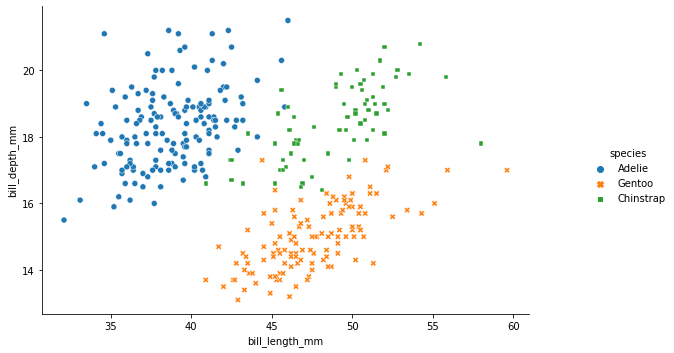

In [7]:
#Gráfico de disperção mostrando como estão distribuidas as espécies.
g=sns.relplot(x='bill_length_mm',y='bill_depth_mm',data=penguin_df,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

Pairplot ou gráficos de pares são uma maneira realmente simples (uma linha de código simples!) De visualizar as relações entre cada variável. Ele produz uma matriz de relacionamentos entre cada variável em seus dados para um exame instantâneo de nossos dados.

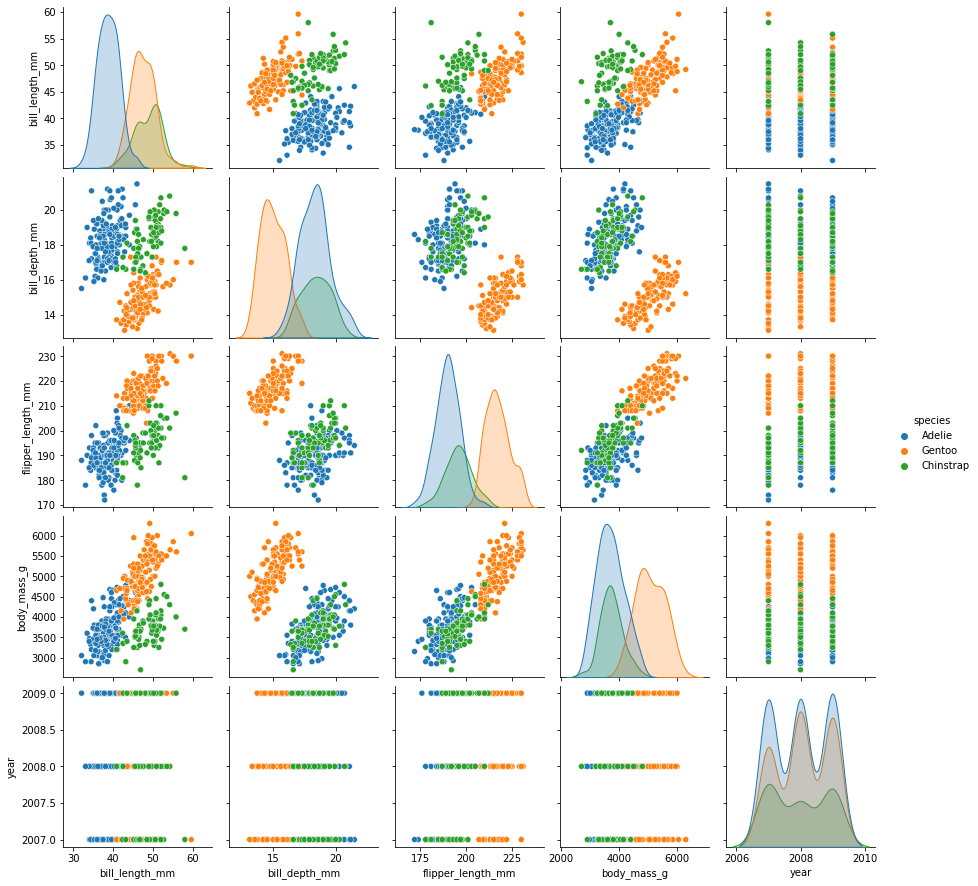

In [8]:
sns.pairplot(penguin_df,hue="species")
plt.show()

In [9]:
# Apagar algumas linhas que tenham valores nulos
penguin_df.dropna(inplace=True) 

In [10]:
#definir a variável target, ou seja a variável que eu quero prever baseado nos dados que serão utilizados
output = penguin_df['species'] 
#definir as variáveis que seão utilizadas no modelo, não vou não vou utilizar a variavel year, 
#pois não se encaixa para esse modelo
features = penguin_df[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']] 
 # Gerar as variaveis em one-hot-encondig, necessárias para otimizar o treinamento do modelo.
features = pd.get_dummies(features) 
output, uniques = pd.factorize(output) 

In [11]:
#Dataframe depois de relializar one-hot-enconding.
features.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1


## Criação do Modelo 
Vou criar um um modelo de classificação utilizando randomforest 


In [12]:
#separar dados de treino e dados de teste
x_train, x_test, y_train, y_test = train_test_split(features, output, test_size=.8) 

rfc = RandomForestClassifier(random_state=15) 
#treinando o modelo
rfc.fit(x_train, y_train) 
#guardar variavel y_pred os resultados
y_pred = rfc.predict(x_test) 
#verificar a acurácia do modelo
score = accuracy_score(y_pred, y_test) 
print('Acurácia para esse modelo é  {}'.format(score)) 

Acurácia para esse modelo é  0.9775280898876404


97% de acurácia , está ok

Salvar o modelo junto com os dados mapeados das especies e a saída do modelo.

In [13]:

rf_pickle = open('random_forest_penguin.pickle', 'wb') 
pickle.dump(rfc, rf_pickle) 
rf_pickle.close() 
output_pickle = open('output_penguin.pickle', 'wb') 
pickle.dump(uniques, output_pickle) 
output_pickle.close() 



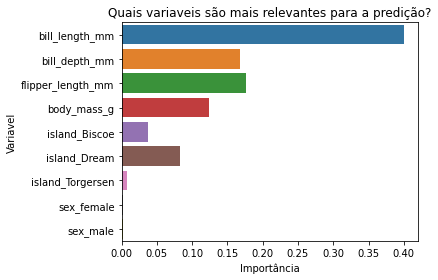

In [14]:
#grafico de barras indicando a importancia de cada variavel para o modelo
fig, ax = plt.subplots() 
ax = sns.barplot(x=rfc.feature_importances_, y=features.columns) 
plt.title('Quais variaveis são mais relevantes para a predição?') 
plt.xlabel('Importância') 
plt.ylabel('Variavel') 
plt.tight_layout() 
fig.savefig('feature_importance.png') 